## Import the required libraries

In [392]:
import numpy as np
import pandas as pd
import pickle
import scipy.sparse as sp
from scipy.sparse.linalg import svds

In [2]:
# Reading the ratings data
ratings = pd.read_csv('Dataset/ratings.csv')

In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1048575 non-null  int64  
 1   movieId    1048575 non-null  int64  
 2   rating     1048575 non-null  float64
 3   timestamp  1048575 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 32.0 MB


In [6]:
#Just taking the required columns
ratings = ratings[['userId', 'movieId','rating']]

In [7]:
# Checking if the user has rated the same movie twice, in that case we just take max of them
ratings_df = ratings.groupby(['userId','movieId']).aggregate(np.max)

In [8]:
# In this case there are no such cases where the user has rated the same movie twice.ratings_df)
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1048575 entries, (1, 2) to (7120, 266)
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   rating  1048575 non-null  float64
dtypes: float64(1)
memory usage: 12.2 MB


In [9]:
# Inspecting the data
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [10]:
ratings_df.head()

rating
userId movieId        
1      2           3.5
       29          3.5
       32          3.5
       47          3.5
       50          3.5

In [11]:
# Counting no of unique users
len(ratings['userId'].unique())

7120

In [25]:
#Getting the percentage count of each rating value 
count_ratings = ratings.groupby('rating').count()

In [26]:

count_ratings['perc_total']=round(count_ratings['userId']*100/count_ratings['userId'].sum(),1)

In [27]:
count_ratings

,userId,movieId,perc_total
rating,,,
0.5,13232,13232,1.3
1.0,35144,35144,3.4
1.5,14029,14029,1.3
2.0,74706,74706,7.1
2.5,44791,44791,4.3
3.0,226202,226202,21.6
3.5,112926,112926,10.8
4.0,295135,295135,28.1
4.5,79848,79848,7.6


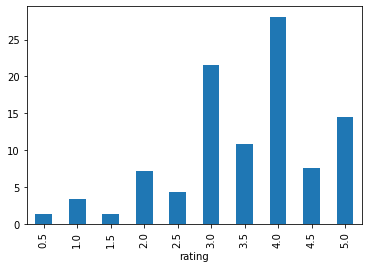

In [28]:
#Visualising the percentage total for each rating
count_ratings['perc_total'].plot.bar()

In [29]:
#reading the movies dataset
movie_list = pd.read_csv('Dataset/movies.csv')

In [30]:
len(movie_list)

27278

In [116]:
# insepcting the movie list dataframe
movie_list.head()

,movieId,title,genres
0,1,toy story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,jumanji (1995),Adventure|Children|Fantasy
2,3,grumpier old men (1995),Comedy|Romance
3,4,waiting to exhale (1995),Comedy|Drama|Romance
4,5,father of the bride part ii (1995),Comedy


In [115]:
movie_list['title']=movie_list['title'].apply(lambda x: x.lower())

In [32]:
# reading the tags datast
tags = pd.read_csv('Dataset/tags.csv')

In [33]:
# inspecting the tags data frame
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [34]:
# inspecting various genres
genres = movie_list['genres']

In [35]:
genres.head()

0    Adventure|Animation|Children|Comedy|Fantasy
1                     Adventure|Children|Fantasy
2                                 Comedy|Romance
3                           Comedy|Drama|Romance
4                                         Comedy
Name: genres, dtype: object

In [38]:
genre_list = ""
for index,row in movie_list.iterrows():
        genre_list += row['genres'] + "|"
#split the string into a list of values
genre_list_split = genre_list.split('|')
#de-duplicate values
new_list = list(set(genre_list_split))
#remove the value that is blank
new_list.remove('')
#inspect list of genres
new_list

['Sci-Fi',
 'Action',
 'War',
 'Romance',
 'Western',
 'Animation',
 'Film-Noir',
 'Adventure',
 'Documentary',
 'Mystery',
 'Drama',
 'IMAX',
 'Fantasy',
 '(no genres listed)',
 'Children',
 'Comedy',
 'Crime',
 'Thriller',
 'Musical',
 'Horror']

In [39]:
#Enriching the movies dataset by adding the various genres columns.
movies_with_genres = movie_list.copy()

for genre in new_list :
    movies_with_genres[genre] = movies_with_genres.apply(lambda _:int(genre in _.genres), axis = 1)

In [40]:
movies_with_genres.head()

,movieId,title,genres,Sci-Fi,Action,War,Romance,Western,Animation,Film-Noir,...,Drama,IMAX,Fantasy,(no genres listed),Children,Comedy,Crime,Thriller,Musical,Horror
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,1,0,...,0,0,1,0,1,1,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [41]:
#Calculating the sparsity
no_of_users = len(ratings['userId'].unique())
no_of_movies = len(ratings['movieId'].unique())

sparsity = round(1.0 - len(ratings)/(1.0*(no_of_movies*no_of_users)),3)
print(sparsity)

0.99


In [42]:
# Counting the number of unique movies in the dataset.
len(ratings['movieId'].unique())

14026

In [43]:
# Finding the average rating for movie and the number of ratings for each movie
avg_movie_rating = pd.DataFrame(ratings.groupby('movieId')['rating'].agg(['mean','count']))
avg_movie_rating['movieId']= avg_movie_rating.index

In [44]:
# inspecting the average movie rating data frame
avg_movie_rating.head()

,mean,count,movieId
movieId,,,
1,3.959323,2569,1
2,3.268398,1155,2
3,3.186861,685,3
4,3.000000,138,4
5,3.143836,657,5


In [45]:
len(avg_movie_rating)

14026

In [46]:
#calculate the percentile count. It gives the no of ratings at least 70% of the movies have
np.percentile(avg_movie_rating['count'],70)

30.0

In [47]:
#Get the average movie rating across all movies 
avg_rating_all=ratings['rating'].mean()
avg_rating_all
#set a minimum threshold for number of reviews that the movie has to have
min_reviews=30
movie_score = avg_movie_rating.loc[avg_movie_rating['count']>min_reviews]
movie_score.head()

,mean,count,movieId
movieId,,,
1,3.959323,2569,1
2,3.268398,1155,2
3,3.186861,685,3
4,3.000000,138,4
5,3.143836,657,5


In [48]:
len(movie_score)

4173

## Calculation based on IMDB formula


In [49]:
#create a function for weighted rating score based off count of reviews
def weighted_rating(x, m=min_reviews, C=avg_rating_all):
    v = x['count']
    R = x['mean']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [50]:
#Calculating the weighted score for each movie
movie_score['weighted_score'] = movie_score.apply(weighted_rating, axis=1)
movie_score.head()

<ipython-input-50-f069e78bacf9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_score['weighted_score'] = movie_score.apply(weighted_rating, axis=1)


,mean,count,movieId,weighted_score
movieId,,,,
1,3.959323,2569,1,3.954359
2,3.268398,1155,2,3.275003
3,3.186861,685,3,3.201228
4,3.000000,138,4,3.094513
5,3.143836,657,5,3.160667


In [53]:
# Have to drop this movieId column to avoid ambiguity while merging
movie_score.drop('movieId',axis=1, inplace=True)

C:\Users\zuddi\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
#join movie details to movie ratings
movie_score = pd.merge(movie_score,movies_with_genres,on='movieId')
#join movie links to movie ratings
#movie_score = pd.merge(movie_score,links,on='movieId')
movie_score.head()

,movieId,mean,count,weighted_score,title,genres,Sci-Fi,Action,War,Romance,...,Drama,IMAX,Fantasy,(no genres listed),Children,Comedy,Crime,Thriller,Musical,Horror
0,1,3.959323,2569,3.954359,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
1,2,3.268398,1155,3.275003,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,3,3.186861,685,3.201228,Grumpier Old Men (1995),Comedy|Romance,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,3.000000,138,3.094513,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
4,5,3.143836,657,3.160667,Father of the Bride Part II (1995),Comedy,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [55]:
#list top scored movies over the whole range of movies
pd.DataFrame(movie_score.sort_values(['weighted_score'],ascending=False)[['title','weighted_score','genres']][:10])

,title,count,mean,weighted_score,genres
242,"Shawshank Redemption, The (1994)",3216,4.469994,4.461299,Crime|Drama
565,"Godfather, The (1972)",2137,4.388161,4.376270,Crime|Drama
46,"Usual Suspects, The (1995)",2490,4.370482,4.360468,Crime|Mystery|Thriller
403,Schindler's List (1993),2598,4.295612,4.286864,Drama|War
791,"Godfather: Part II, The (1974)",1418,4.278561,4.263037,Crime|Drama
3230,Band of Brothers (2001),228,4.353070,4.257280,Action|Drama|War
593,Casablanca (1942),1282,4.268721,4.251813,Drama|Romance
2937,City of God (Cidade de Deus) (2002),646,4.258514,4.226151,Action|Adventure|Crime|Drama|Thriller
589,North by Northwest (1959),817,4.250306,4.224768,Action|Adventure|Mystery|Romance|Thriller
3814,"Dark Knight, The (2008)",1031,4.242968,4.222788,Action|Crime|Drama|IMAX


## Best movies based on genre

In [56]:
# Gives the best movies according to genre based on weighted score which is calculated using IMDB formula
def best_movies_by_genre(genre,top_n):
    return pd.DataFrame(movie_score.loc[(movie_score[genre]==1)].sort_values(['weighted_score'],ascending=False)[['title','weighted_score']][:top_n])

In [57]:
#run function to return top recommended movies by genre
best_movies_by_genre('Musical',10)  

,title,weighted_score
824,Duck Soup (1933),4.151220
580,Singin' in the Rain (1952),4.067969
3909,Dr. Horrible's Sing-Along Blog (2008),4.062224
1777,Stop Making Sense (1984),4.019316
2647,Fiddler on the Roof (1971),3.968606
600,"Wizard of Oz, The (1939)",3.937552
588,"Gay Divorcee, The (1934)",3.935381
1438,Nashville (1975),3.923279
624,Top Hat (1935),3.909188
3297,"Day at the Races, A (1937)",3.899730


In [58]:
#run function to return top recommended movies by genre
best_movies_by_genre('Action',10)  

,title,weighted_score
3230,Band of Brothers (2001),4.257280
2937,City of God (Cidade de Deus) (2002),4.226151
589,North by Northwest (1959),4.224768
3814,"Dark Knight, The (2008)",4.222788
1838,Fight Club (1999),4.209399
769,Raiders of the Lost Ark (Indiana Jones and the...,4.197446
1256,Seven Samurai (Shichinin no samurai) (1954),4.190510
199,Star Wars: Episode IV - A New Hope (1977),4.182637
1629,"Matrix, The (1999)",4.169242
768,"Princess Bride, The (1987)",4.166312


In [59]:
#run function to return top recommended movies by genre
best_movies_by_genre('Children',10)  

,title,weighted_score
518,Wallace & Gromit: A Close Shave (1995),4.146286
741,Wallace & Gromit: The Wrong Trousers (1993),4.111568
793,"Grand Day Out with Wallace and Gromit, A (1989)",4.058382
3833,WALL·E (2008),4.050260
2927,My Neighbor Totoro (Tonari no Totoro) (1988),4.045816
1753,"Christmas Story, A (1983)",4.014495
3991,How to Train Your Dragon (2010),4.003326
3931,Up (2009),4.002591
4004,Toy Story 3 (2010),3.996661
2989,Laputa: Castle in the Sky (Tenkû no shiro Rapy...,3.973606


In [60]:
#run function to return top recommended movies by genre
best_movies_by_genre('Drama',10)  

,title,weighted_score
242,"Shawshank Redemption, The (1994)",4.461299
565,"Godfather, The (1972)",4.376270
403,Schindler's List (1993),4.286864
791,"Godfather: Part II, The (1974)",4.263037
3230,Band of Brothers (2001),4.257280
593,Casablanca (1942),4.251813
2937,City of God (Cidade de Deus) (2002),4.226151
3814,"Dark Knight, The (2008)",4.222788
765,One Flew Over the Cuckoo's Nest (1975),4.222180
1838,Fight Club (1999),4.209399


In [1]:
### ratings_df = pd.pivot_table(ratings, index='userId', columns='movieId', aggfunc=np.max)

In [70]:
#merging ratings and movies dataframes
ratings_movies = pd.merge(ratings,movie_list, on = 'movieId')

In [71]:
ratings_movies.head()

,userId,movieId,rating,title,genres
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,Jumanji (1995),Adventure|Children|Fantasy


### Get top 10 movies which are watched by the people who saw this particular movie

In [72]:
def similar_movies(movie_name):
    #get all users who watched a specific movie
    df_movie_users_series = ratings_movies.loc[ratings_movies['title']==movie_name]['userId']
    #convert to a data frame
    df_movie_users = pd.DataFrame(df_movie_users_series,columns=['userId'])
    #get a list of all other movies watched by these users
    other_movies = pd.merge(df_movie_users,ratings_movies,on='userId')
    #get a list of the most commonly watched movies by these other user
    other_users_watched = pd.DataFrame(other_movies.groupby('title')['userId'].count()).sort_values('userId',ascending=False)
    other_users_watched['perc_who_watched'] = round(other_users_watched['userId']*100/other_users_watched['userId'][0],1)
    return other_users_watched[:10]

In [73]:
# Getting other top 10 movies which are watched by the people who saw 'Gone Girl'
similar_movies('Gone Girl (2014)')

,userId,perc_who_watched
title,,
Gone Girl (2014),61,100.0
"Matrix, The (1999)",54,88.5
Inception (2010),53,86.9
Fight Club (1999),52,85.2
"Shawshank Redemption, The (1994)",52,85.2
"Dark Knight, The (2008)",52,85.2
"Lord of the Rings: The Fellowship of the Ring, The (2001)",51,83.6
"Lord of the Rings: The Return of the King, The (2003)",50,82.0
Pulp Fiction (1994),48,78.7


In [74]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

In [77]:
avg_movie_rating.head()

,mean,count,movieId
movieId,,,
1,3.959323,2569,1
2,3.268398,1155,2
3,3.186861,685,3
4,3.000000,138,4
5,3.143836,657,5


In [89]:
#only include movies with more than 10 ratings
min_movie_ratings= avg_movie_rating.loc[avg_movie_rating['count']>10]
print(len(min_movie_ratings))

6624


In [90]:
min_movie_ratings=min_movie_ratings.drop('movieId',axis=1)

In [91]:
final_dataset = pd.merge(min_movie_ratings, ratings, on="movieId")
len(final_dataset)

1023513

In [114]:
final_dataset.head()

,movieId,mean,count,userId,rating
0,1,3.959323,2569,3,4.0
1,1,3.959323,2569,6,5.0
2,1,3.959323,2569,8,4.0
3,1,3.959323,2569,10,4.0
4,1,3.959323,2569,11,4.5


## Creating a data frame that has user ratings accross all movies in form of matrix used in matrix factorisation

In [93]:
#create a matrix table with movieIds on the rows and userIds in the columns.
#replace NAN values with 0
movie_matrix = final_dataset.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)
movie_matrix.head()

userId,1,2,3,4,5,6,7,8,9,10,...,7111,7112,7113,7114,7115,7116,7117,7118,7119,7120
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,4.0,0.0,0.0,5.0,0.0,4.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,5.0,4.5
2,3.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,0.0,4.0,0.0,0.0,0.0,3.0,3.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,3.5,0.0,0.0,0.0,0.0


In [224]:
len(movie_matrix)

6624

In [94]:
csr_data = csr_matrix(movie_matrix.values)
movie_matrix.reset_index(inplace=True)

In [95]:
#specify model parameters
knn=NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
#fit model to the data set
knn.fit(csr_data)


NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

## Movie Recommendation using collaborative filtering approach

In [123]:
def get_movie_recommendation(movie_name):
    movie_name=movie_name.lower()
    movies_to_recommend = 10
    recommend = movie_list[movie_list['title'].str.contains(movie_name)]  
    if len(recommend):        
        movie_idx= recommend.iloc[0]['movieId']
        movie_idx = movie_matrix[movie_matrix['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=movies_to_recommend+1) # +1 indicates the given movie name count   
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = movie_matrix.iloc[val[0]]['movieId']
            idx = movie_list[movie_list['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movie_list.iloc[idx]['title'].values[0],'Distance':val[1]})
        recom_movies = pd.DataFrame(recommend_frame,index=range(1,movies_to_recommend+1))
        return recom_movies
    else:
        return "No movies found. Please check your input"

In [141]:
get_movie_recommendation('iron man')

,Title,Distance
1,watchmen (2009),0.473669
2,iron man 2 (2010),0.461703
3,v for vendetta (2006),0.457004
4,batman begins (2005),0.448323
5,avatar (2009),0.443566
6,"bourne ultimatum, the (2007)",0.442207
7,300 (2007),0.434176
8,wall·e (2008),0.417565
9,"dark knight, the (2008)",0.386882
10,star trek (2009),0.381261


In [142]:
get_movie_recommendation('avengers')

,Title,Distance
1,spawn (1997),0.736755
2,"view to a kill, a (1985)",0.734603
3,"mask of zorro, the (1998)",0.733213
4,ghostbusters ii (1989),0.732969
5,"addams family, the (1991)",0.732537
6,mercury rising (1998),0.728428
7,godzilla (1998),0.726164
8,batman returns (1992),0.716384
9,batman & robin (1997),0.711272
10,lost in space (1998),0.688491


## Approach which uses movie index to get recommendations instead of movie name

In [149]:
model_knn=NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
#fit model to the data set
model_knn.fit(movie_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [150]:
#Gets the top 10 nearest neighbours got the movie
def print_similar_movies(query_index) :
    #get the list of user ratings for a specific userId
    query_index_movie_ratings = movie_matrix.loc[query_index,:].values.reshape(1,-1)
    #get the closest 10 movies and their distances from the movie specified
    distances,indices = model_knn.kneighbors(query_index_movie_ratings,n_neighbors = 11) 
    #write a lopp that prints the similar movies for a specified movie.
    for i in range(0,len(distances.flatten())):
        #get the title of the random movie that was chosen
        get_movie = movie_list.loc[movie_list['movieId']==query_index]['title']
        #for the first movie in the list i.e closest print the title
        if i==0:
            print('Recommendations for {0}:\n'.format(get_movie))
        else :
            #get the indiciees for the closest movies
            indices_flat = indices.flatten()[i]
            #get the title of the movie
            get_movie = movie_list.loc[movie_list['movieId']==movie_matrix.iloc[indices_flat,:].name]['title']
            #print the movie
            print('{0}: {1}, with distance of {2}:'.format(i,get_movie,distances.flatten()[i]))

In [151]:
print_similar_movies(1)

Recommendations for 0    toy story (1995)
Name: title, dtype: object:

1: 31    twelve monkeys (a.k.a. 12 monkeys) (1995)
Name: title, dtype: object, with distance of 0.5849388125632528:
2: Series([], Name: title, dtype: object), with distance of 0.5899995991270419:
3: 17    four rooms (1995)
Name: title, dtype: object, with distance of 0.5960267100411242:
4: 8    sudden death (1995)
Name: title, dtype: object, with distance of 0.5975943833182502:
5: 43    mortal kombat (1995)
Name: title, dtype: object, with distance of 0.6120507855339214:
6: 95    hate (haine, la) (1995)
Name: title, dtype: object, with distance of 0.6190985608881485:
7: 30    dangerous minds (1995)
Name: title, dtype: object, with distance of 0.6234986190632132:
8: 35    dead man walking (1995)
Name: title, dtype: object, with distance of 0.6453507068576161:
9: 120    boomerang (1992)
Name: title, dtype: object, with distance of 0.6488353851903388:
10: 9    goldeneye (1995)
Name: title, dtype: object, with distance 

In [153]:
print_similar_movies(960)

Recommendations for 943    angel on my shoulder (1946)
Name: title, dtype: object:

1: 3517    pee-wee's big adventure (1985)
Name: title, dtype: object, with distance of 0.0030281195185098975:
2: 2507    joyriders, the (1999)
Name: title, dtype: object, with distance of 0.003069479995952973:
3: 2045    saltmen of tibet, the (salzmänner von tibet, d...
Name: title, dtype: object, with distance of 0.0030763777584530416:
4: 2278    godzilla (gojira) (1954)
Name: title, dtype: object, with distance of 0.003095637604060175:
5: 1931    absent-minded professor, the (1961)
Name: title, dtype: object, with distance of 0.0030997329566323506:
6: 2118    lifeboat (1944)
Name: title, dtype: object, with distance of 0.003105673745836146:
7: 2051    doctor dolittle (1967)
Name: title, dtype: object, with distance of 0.0031066872216510832:
8: 1621    joy luck club, the (1993)
Name: title, dtype: object, with distance of 0.0031094083739788836:
9: 2523    heaven (1998)
Name: title, dtype: object, with 

In [154]:
movies_with_genres.head()

,movieId,title,genres,Sci-Fi,Action,War,Romance,Western,Animation,Film-Noir,...,Drama,IMAX,Fantasy,(no genres listed),Children,Comedy,Crime,Thriller,Musical,Horror
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,1,0,...,0,0,1,0,1,1,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [242]:
#Getting the movies list with only genres like Musical and other such columns
movie_content_df_temp = movies_with_genres.copy()
movie_content_df_temp.set_index('movieId')
movie_content = movie_content_df_temp.drop(columns = ['movieId','title','genres'])
movie_content= movie_content.values
movie_content

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [246]:
len(movie_list)


27278

In [157]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(movie_content,movie_content)

In [158]:
# Similarity of the movies based on the content
cosine_sim

array([[5., 3., 1., ..., 1., 0., 2.],
       [3., 3., 0., ..., 1., 0., 2.],
       [1., 0., 2., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [2., 2., 0., ..., 1., 0., 3.]])

## Top 10 similar movies based on the content

In [267]:
def similar_content(movie_name):
    movies_to_recommend = 10
    recommend = movie_content_df_temp[movie_content_df_temp['title'].str.contains(movie_name)]
    if len(recommend):
        movie_idx= recommend.iloc[0]['movieId']
        movie_idx = movie_content_df_temp[movie_content_df_temp['movieId'] == movie_idx].index[0]
        sim_scores = list(enumerate(cosine_sim[movie_idx]))
        # Sort the movies based on the similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        # Get the scores of the 10 most similar movies
        sim_scores = sim_scores[0:11]
        movie_indices = [i[0] for i in sim_scores]
        similar_movies = pd.DataFrame(movie_content_df_temp[['title','genres']].iloc[movie_indices])
        return similar_movies
    else:
        return "No movies found. Please check your input"
    
    

In [268]:
similar_content('Skyfall')

,title,genres
6260,"Matrix Reloaded, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX
6822,"Matrix Revolutions, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX
11018,Poseidon (2006),Action|Adventure|Thriller|IMAX
11826,Spider-Man 3 (2007),Action|Adventure|Sci-Fi|Thriller|IMAX
15203,Iron Man 2 (2010),Action|Adventure|Sci-Fi|Thriller|IMAX
16733,Sanctum (2011),Action|Adventure|Drama|Thriller|IMAX
18315,"Bourne Legacy, The (2012)",Action|Adventure|Drama|Thriller|IMAX
18349,Mission: Impossible - Ghost Protocol (2011),Action|Adventure|Thriller|IMAX
19338,Skyfall (2012),Action|Adventure|Thriller|IMAX
20615,G.I. Joe: Retaliation (2013),Action|Adventure|Sci-Fi|Thriller|IMAX


## SVD Implementation

In [387]:
from surprise import SVD
import numpy as np
import surprise
from surprise import Reader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb


In [283]:
# Splitting the data into train and test.
train, test = train_test_split(ratings, test_size=0.2)

In [284]:
X_train=train.drop('rating',axis=1)
y_train=train['rating']
X_test=test.drop('rating',axis=1)
y_test=test['rating']

In [292]:
# It is to specify how to read the data frame.
reader = Reader(rating_scale=(1,5))
# create the traindata from the data frame
train_data = Dataset.load_from_df(train[['userId', 'movieId', 'rating']], reader)
test_data = Dataset.load_from_df(test[['userId', 'movieId', 'rating']], reader)
# build the train set from traindata. 
#It is of dataset format from surprise library
trainset = train_data.build_full_trainset()
testset=test_data.build_full_trainset()



In [293]:
svd = SVD(n_factors=100, biased=True, random_state=15, verbose=True)
svd.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19


In [296]:
#getting predictions of test set
test_preds = svd.test(testset.build_testset())
test_pred_mf = np.array([pred.est for pred in test_preds])

In [298]:
len(test)

209715

In [300]:
mse=mean_squared_error(y_test,test_pred_mf)

In [306]:
# Calculating the root mean_squared_error of the svd model
rmse=np.sqrt(mse)
print(rmse)

1.2370049136165115


## XGBoost Model Implementation

In [309]:
xgb_model = xgb.XGBRegressor(silent=False, n_jobs=13,random_state=15,n_estimators=100)
xgb_model.fit(X_train, y_train, eval_metric = 'rmse')

[20:06:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=13, num_parallel_tree=1, random_state=15,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, silent=False,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [310]:
y_pred=xgb_model.predict(X_test)


In [311]:
mse_xgb=mean_squared_error(y_test,y_pred)

In [329]:
mse_xgb

0.9096359171871928

In [312]:
rmse_xgb=np.sqrt(mse_xgb)
print(rmse_xgb)

0.9537483510796718


In [318]:
mape = np.mean(np.abs( (y_test- y_pred)/y_test )) * 100

In [319]:
mape

33.93146851001097

In [389]:
# Converting the userId and movieId as categorical varaibles

ratings.userId = ratings.userId.astype('category').cat.codes.values
ratings.movieId = ratings.movieId.astype('category').cat.codes.values

In [321]:
train2, test2 = train_test_split(ratings, test_size=0.2)

In [324]:
X_train=train2.drop('rating',axis=1)
y_train=train2['rating']
X_test=test2.drop('rating',axis=1)
y_test=test2['rating']

In [325]:
xgb_model = xgb.XGBRegressor(silent=False, n_jobs=13,random_state=15,n_estimators=100)
xgb_model.fit(X_train, y_train, eval_metric = 'rmse')

[20:17:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=13, num_parallel_tree=1, random_state=15,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, silent=False,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [326]:
y_pred2=xgb_model.predict(X_test)

In [328]:
np.sqrt(mean_squared_error(y_test,y_pred2))

0.9528301661447792

## Implementing Deep Neural Network

In [368]:
#import libraries
import tensorflow
import keras
from keras.layers import Embedding, Reshape, concatenate, dot
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [369]:
from keras.utils import plot_model

In [390]:
# Couting no of unique users and movies
len(ratings.userId.unique()), len(ratings.movieId.unique())

(7120, 14026)

In [391]:
n_users, n_movies = len(ratings.userId.unique()), len(ratings.movieId.unique())

In [370]:
# Returns a neural network model which performs matrix factorisation
def matrix_factorisation_model_with_n_latent_factors(n_latent_factors):
    movie_input = keras.layers.Input(shape=[1],name='Item')
    movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors, name='Movie-Embedding')(movie_input)
    movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)

    user_input = keras.layers.Input(shape=[1],name='User')
    user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors,name='User-Embedding')(user_input))
    prod = keras.layers.dot([movie_vec, user_vec], axes=1)
    
    model = keras.Model([user_input, movie_input], prod)
    model.compile('adam', 'mean_squared_error')
    
    return model

In [371]:
model = matrix_factorisation_model_with_n_latent_factors(5)

In [372]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
User (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
Movie-Embedding (Embedding)     (None, 1, 5)         70135       Item[0][0]                       
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 5)         35605       User[0][0]                       
_______________________________________________________________________________________

In [384]:
#Training the model
history = model.fit([X_train['userId'],X_train['movieId']], y_train.values, epochs=50, verbose=0)

In [385]:
y_hat = np.round(model.predict([X_test.userId, X_test.movieId]),0)
mean_absolute_error(y_test, y_hat)

0.6462818587130152

In [386]:
mse=mean_squared_error(y_test,y_hat)
np.sqrt(mse)


0.9162794252424674

##### Our final model resulted in 0.91 RMSE, and RMSE less than 2 is considered good so our model is a good-to-go,
#### The model can be furthur improved by adding additional features into the data by implementing complex feature engineering techniques.